<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №1__

Техническая часть у проекта сделана достаточно хорошо, нужно только доделать одну проверку на корректность данных для теста. Больше нужно поработать с описательной частью по графикам, выводам и гипотезам в А/Б-тесте. Думаю для тебя это будет не очень сложно и ты быстро с этим справишься) Буду ждать проект на повторную проверку!

</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №2__

Привет, в проекте правильно проведен А/Б-тест, найдены приоритетные гипотезы для проверки и аномальные значения, построены кумулятивные метрики и визуализация к ним. Все выводы на месте, так что проект принят!

</div>

## Обзор данных

### Импорт необходимых библиотек и чтение файлов с данными

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import datetime as dt

In [4]:
hypos = pd.read_csv('/datasets/hypothesis.csv' , sep=',') #чтение и сохранение датасета с гипотезами
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypos

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


### Изучение информации в датафркймах

In [7]:
hypos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


## Подготовка данных

In [10]:
print(hypos.isna().sum())
print(orders.isna().sum())
print(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [11]:
print(hypos.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


In [12]:
hypos.columns = hypos.columns.str.lower()
hypos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [13]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [15]:
(
    orders[['revenue']]
    .apply (['count', 'min', 'max']) 
    .style.format("{:,.2f}")
)

,revenue
count,"1,197.00"
min,50.00
max,"1,294,500.00"


In [16]:
(
    visitors[['visitors']]
    .apply (['count', 'min', 'max']) 
    .style.format("{:,.2f}")
)

,visitors
count,62.00
min,361.00
max,770.00


In [21]:
orders['visitorId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [22]:
a = orders.query('group == "A"')['visitorId']
b = orders.query('group == "B"')['visitorId']
c = []
for i in a:
    for g in b:
        if i == g:
            c.append(g)
c = set(c)
len(c)

58

In [25]:
len(list(set(a) & set(b)))

58

In [91]:
for i in c:
    display(orders[orders['visitorId'] == i])

,transactionId,visitorId,date,revenue,group
269,1067267410,3957174400,2019-08-18,2480,A
561,3241914033,3957174400,2019-08-26,2480,B


,transactionId,visitorId,date,revenue,group
304,609915801,2780786433,2019-08-28,1200,A
548,430186476,2780786433,2019-08-29,1580,A
857,847315305,2780786433,2019-08-27,540,B


,transactionId,visitorId,date,revenue,group
310,3532704780,3984495233,2019-08-03,20219,B
536,3925488023,3984495233,2019-08-04,20219,A
698,429858801,3984495233,2019-08-05,14495,A


,transactionId,visitorId,date,revenue,group
402,371848868,1294878855,2019-08-28,3080,B
677,2348589867,1294878855,2019-08-09,27390,A
1015,4262851755,1294878855,2019-08-31,570,A


,transactionId,visitorId,date,revenue,group
189,4189935502,1648269707,2019-08-17,290,B
279,1101659272,1648269707,2019-08-18,860,A


,transactionId,visitorId,date,revenue,group
627,4212256267,4120364173,2019-08-29,39800,A
1021,969750843,4120364173,2019-08-31,15500,B


,transactionId,visitorId,date,revenue,group
685,2972137054,1614305549,2019-08-29,9680,B
687,2663041816,1614305549,2019-08-29,1530,A
767,1278695805,1614305549,2019-08-21,750,A
1195,1947021204,1614305549,2019-08-14,100,A


,transactionId,visitorId,date,revenue,group
1009,2670069237,232979603,2019-08-31,2640,B
1013,83566152,232979603,2019-08-31,60,A


,transactionId,visitorId,date,revenue,group
26,2223239646,199603092,2019-08-15,3488,A
134,62794304,199603092,2019-08-22,6976,A
246,437656952,199603092,2019-08-02,3488,B
823,2971973105,199603092,2019-08-27,2790,A
1102,1941707234,199603092,2019-08-12,6438,A


,transactionId,visitorId,date,revenue,group
662,1811671147,4266935830,2019-08-29,78990,A
682,1216533772,4266935830,2019-08-29,78990,B


,transactionId,visitorId,date,revenue,group
61,1251767592,2712142231,2019-08-16,790,B
1173,3612788481,2712142231,2019-08-14,2490,A


,transactionId,visitorId,date,revenue,group
415,1825231501,2587333274,2019-08-06,8870,B
729,2667448076,2587333274,2019-08-07,6170,B
970,3478707774,2587333274,2019-08-08,3600,A
972,2419539947,2587333274,2019-08-08,3600,B


,transactionId,visitorId,date,revenue,group
139,4141167864,2716752286,2019-08-01,7990,B
197,2632798290,2716752286,2019-08-02,2220,A


,transactionId,visitorId,date,revenue,group
327,3909269888,1668030113,2019-08-28,5070,B
782,2339954598,1668030113,2019-08-27,2600,A
1182,2682156369,1668030113,2019-08-14,1290,B


,transactionId,visitorId,date,revenue,group
1122,3620682463,2654030115,2019-08-13,1980,B
1156,1254962016,2654030115,2019-08-14,1980,A


,transactionId,visitorId,date,revenue,group
24,1162046357,3234906277,2019-08-15,7555,B
249,1360774578,3234906277,2019-08-18,7555,A


,transactionId,visitorId,date,revenue,group
672,3667885894,1230306981,2019-08-09,6613,A
674,1748608673,1230306981,2019-08-09,6400,B
675,2658936877,1230306981,2019-08-09,6440,B
676,278311817,1230306981,2019-08-09,1690,A
739,2541955961,1230306981,2019-08-09,10137,A


,transactionId,visitorId,date,revenue,group
406,1441855393,1404934699,2019-08-03,26980,B
1036,2890600501,1404934699,2019-08-09,8340,B
1044,1814628689,1404934699,2019-08-11,8640,A


,transactionId,visitorId,date,revenue,group
29,2220299125,3803269165,2019-08-15,700,A
252,473864496,3803269165,2019-08-23,2360,B
693,3244441077,3803269165,2019-08-09,590,B
1171,2860596918,3803269165,2019-08-14,6613,B
1172,3898641900,3803269165,2019-08-14,790,B


,transactionId,visitorId,date,revenue,group
27,1630050528,237748145,2019-08-15,7620,B
41,2594268419,237748145,2019-08-15,1090,A
590,3702128013,237748145,2019-08-20,1290,A
716,972407388,237748145,2019-08-27,470,A
1097,3357467820,237748145,2019-08-12,340,A


,transactionId,visitorId,date,revenue,group
1178,4052155355,2949041841,2019-08-14,190,A
1184,1329499668,2949041841,2019-08-14,10380,B


,transactionId,visitorId,date,revenue,group
94,252633006,457167155,2019-08-22,5970,B
95,372616894,457167155,2019-08-22,987,B
256,2370268995,457167155,2019-08-23,1620,A
1074,3571123442,457167155,2019-08-12,1280,B


,transactionId,visitorId,date,revenue,group
230,3124204494,2927087541,2019-08-23,27550,A
479,1651227034,2927087541,2019-08-24,2190,B


,transactionId,visitorId,date,revenue,group
129,1665445278,1738359350,2019-08-22,3070,A
330,3006440800,1738359350,2019-08-28,890,B
861,2229298010,1738359350,2019-08-30,2000,B


,transactionId,visitorId,date,revenue,group
111,2736731761,3062433592,2019-08-01,14489,B
112,1638982251,3062433592,2019-08-01,8470,B
1096,3075787818,3062433592,2019-08-12,32610,B
1098,1092419081,3062433592,2019-08-12,16920,A
1100,1671551244,3062433592,2019-08-12,2970,B


,transactionId,visitorId,date,revenue,group
200,2066718132,3656415546,2019-08-23,2845,A
1042,265631116,3656415546,2019-08-11,250,B


,transactionId,visitorId,date,revenue,group
325,4276811111,818047933,2019-08-28,3460,A
1163,2357685128,818047933,2019-08-14,400,B


,transactionId,visitorId,date,revenue,group
525,3031564664,393266494,2019-08-19,21550,A
936,936917445,393266494,2019-08-08,2190,B
1189,4082620617,393266494,2019-08-14,31550,B


,transactionId,visitorId,date,revenue,group
20,2904772834,963407295,2019-08-15,300,B
1183,1458356232,963407295,2019-08-14,4940,A


,transactionId,visitorId,date,revenue,group
844,3734714128,471551937,2019-08-05,22950,A
1166,2676541142,471551937,2019-08-14,3460,B


,transactionId,visitorId,date,revenue,group
265,3743515850,2579882178,2019-08-18,1922,A
267,131747281,2579882178,2019-08-18,19538,B


,transactionId,visitorId,date,revenue,group
430,1168756094,3202540741,2019-08-24,3150,A
432,1061451265,3202540741,2019-08-24,5450,B


,transactionId,visitorId,date,revenue,group
219,2139320439,2686716486,2019-08-23,10960,A
254,1545495643,2686716486,2019-08-23,34340,B


,transactionId,visitorId,date,revenue,group
450,1750160666,1333886533,2019-08-06,1460,A
688,511953429,1333886533,2019-08-29,2950,B


,transactionId,visitorId,date,revenue,group
370,857639553,2044997962,2019-08-24,2540,A
516,3754751399,2044997962,2019-08-26,6090,B
517,582361359,2044997962,2019-08-26,990,B


,transactionId,visitorId,date,revenue,group
842,2076434956,3941795274,2019-08-21,990,A
973,698171827,3941795274,2019-08-22,1320,B


,transactionId,visitorId,date,revenue,group
805,2726113349,1801183820,2019-08-05,100,B
879,1197739160,1801183820,2019-08-05,390,A


,transactionId,visitorId,date,revenue,group
730,3335803766,477780734,2019-08-30,7300,A
732,132561921,477780734,2019-08-30,3650,B


,transactionId,visitorId,date,revenue,group
33,486237576,2378935119,2019-08-15,1650,A
118,4233533907,2378935119,2019-08-22,3390,A
179,1784270968,2378935119,2019-08-17,310,A
391,2213813903,2378935119,2019-08-25,21220,B
435,2430683444,2378935119,2019-08-28,20450,B
473,3224706027,2378935119,2019-08-28,4410,B
697,1612868255,2378935119,2019-08-09,30649,B
1029,469609643,2378935119,2019-08-10,58220,A
1031,1661772358,2378935119,2019-08-10,2640,B


,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
1070,1473132782,4069496402,2019-08-12,640,B


,transactionId,visitorId,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


,transactionId,visitorId,date,revenue,group
829,2514024187,3766097110,2019-08-30,980,A
832,2470658885,3766097110,2019-08-30,360,B


,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A


,transactionId,visitorId,date,revenue,group
23,4252514150,351125977,2019-08-15,15185,B
453,3075639014,351125977,2019-08-06,4485,A


,transactionId,visitorId,date,revenue,group
778,2726404029,1602967004,2019-08-27,4740,B
914,2792059099,1602967004,2019-08-08,4040,A


,transactionId,visitorId,date,revenue,group
85,1701653566,276558944,2019-08-22,12350,B
1093,3894437543,276558944,2019-08-12,5050,A


,transactionId,visitorId,date,revenue,group
32,3666913472,2038680547,2019-08-15,1680,B
117,722060263,2038680547,2019-08-22,760,A
227,4267573899,2038680547,2019-08-17,3470,A
390,2415738512,2038680547,2019-08-25,270,A
577,3932236947,2038680547,2019-08-04,2800,B
578,1570911533,2038680547,2019-08-04,1530,A
605,1215730747,2038680547,2019-08-04,2540,A
624,1666104258,2038680547,2019-08-29,2420,B


,transactionId,visitorId,date,revenue,group
496,2825038272,3951559397,2019-08-29,30990,B
497,246848596,3951559397,2019-08-29,2490,A


,transactionId,visitorId,date,revenue,group
1162,1277417350,3963646447,2019-08-14,6385,A
1165,2289555915,3963646447,2019-08-14,7485,B


,transactionId,visitorId,date,revenue,group
814,1759418862,4186807279,2019-08-21,18560,B
819,380064637,4186807279,2019-08-27,13740,B
1167,3757656646,4186807279,2019-08-14,4990,A


,transactionId,visitorId,date,revenue,group
375,1863281703,1959144690,2019-08-25,16480,A
783,189332332,1959144690,2019-08-27,16480,B


,transactionId,visitorId,date,revenue,group
359,615966907,3717692402,2019-08-28,910,B
809,3362484972,3717692402,2019-08-21,2400,A
838,1607016207,3717692402,2019-08-21,4170,B
938,1575313118,3717692402,2019-08-08,1540,B
1175,1373388206,3717692402,2019-08-14,2400,B


,transactionId,visitorId,date,revenue,group
133,3060563671,2458001652,2019-08-22,5190,A
380,1177690313,2458001652,2019-08-25,2385,B
454,3755354294,2458001652,2019-08-06,7349,B
456,543654048,2458001652,2019-08-06,1620,A
483,2280027650,2458001652,2019-08-06,6681,B
611,1244084011,2458001652,2019-08-04,340,A
692,3586870909,2458001652,2019-08-09,5227,B
727,3959083601,2458001652,2019-08-07,17379,A
883,2412219836,2458001652,2019-08-05,2420,B
916,527333943,2458001652,2019-08-08,5227,B


,transactionId,visitorId,date,revenue,group
480,1954636284,2600415354,2019-08-06,1530,B
1008,2316868256,2600415354,2019-08-31,2790,A


,transactionId,visitorId,date,revenue,group
225,2931845376,2954449915,2019-08-17,10791,A
455,2781850870,2954449915,2019-08-06,3070,B


,transactionId,visitorId,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
900,3922986948,1316129916,2019-08-27,830,B


,transactionId,visitorId,date,revenue,group
159,1170827001,3891541246,2019-08-22,990,A
606,4007826947,3891541246,2019-08-04,480,B
609,332633624,3891541246,2019-08-04,5020,A


,transactionId,visitorId,date,revenue,group
535,3061324106,3972127743,2019-08-04,8401,B
1035,2898835960,3972127743,2019-08-09,8439,A


**Вывод:** В ходе подготовки данных к анализу, загруженные датасеты были проверены на пропуски, дубликаты и несоответствия в типах данных. Был изменен тип данных в столбцах date датафреймов orders и visitors был изменен с object на datetime.
При более глубокой проверки обнаружились 58 пользователей, которые попали в обе группы.

## Приоритезация гипотез

### Приоритезация при помощи ICE

In [120]:
hypos['ICE'] = (hypos['impact'] * hypos['confidence']) / hypos['efforts']
round(hypos[['hypothesis','ICE']].sort_values(by='ICE', ascending=False), 3)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Приоретизация гипотези при помощи метрики ICE выдвинула гипотезу с акцией по скидке на день рождения, гипотезу с добавлением двух новых каналов привлечения трафика и гипотезу по добавлению формы подписки на осн. страницы на верхние места.

### Приоритезация при помощи RICE

In [128]:
hypos['RICE'] = (hypos['reach'] * hypos['impact'] * hypos['confidence']) / hypos['efforts']
round(hypos[['hypothesis','RICE', 'ICE']].sort_values(by='RICE', ascending=False), 3)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000


**Вывод:**
Метрика RICE выделила гипотезу по добавлению формы подписки на осн. страницы для сбора базы клиентов, гипотезу с добавлением блоков рекомендаций товаров на сайт для повышения конверсии и среднего чека, гипотезу с добавлением двух новых каналов привлечения трафика для 30% прироста пользователей и гипотезу с показом баннеров с акциями на главной странице для увеличения конверсии. Особенно сильно выделяется гипотеза с формой подписки на основные страницы, поскольку у нее самый большой охват среди других гипотез, что и стало причиной, по которой она заняла первое место.

## Анализ А/В теста

### График кумулятивной выручки по группам

In [94]:
date_group = orders[['date', 'group']].drop_duplicates()

In [95]:
orders_agg = (date_group
              .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
                     axis=1)
              .sort_values(by=['date','group']))

In [96]:
visitors_agg = (date_group
                .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                       axis=1)
                .sort_values(by=['date', 'group']))

In [97]:
cumulative_data = orders_agg.merge(visitors_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'clients', 'revenue', 'visitors']

In [98]:
cumulative_revA = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revB = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

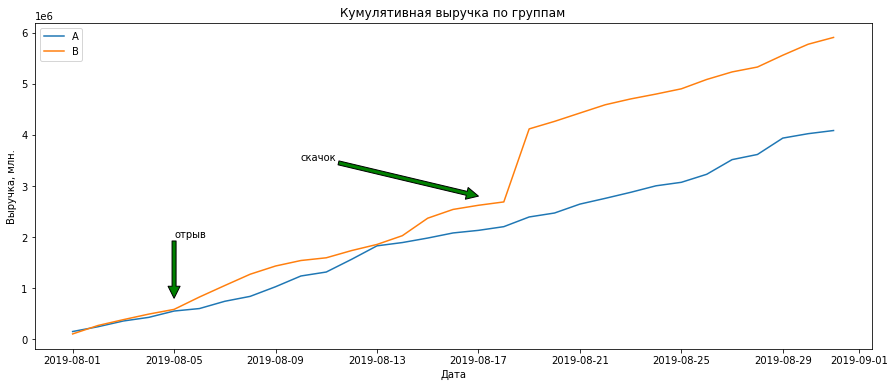

In [133]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_revA['date'], cumulative_revA['revenue'], label='A')
plt.plot(cumulative_revB['date'], cumulative_revB['revenue'], label='B')
plt.ylabel('Выручка, млн.')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 2800000), xytext=(dt.datetime(2019, 8, 10), 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=(dt.datetime(2019, 8, 5), 800000), xytext=(dt.datetime(2019, 8, 5), 2000000),
            arrowprops=dict(facecolor='g'))
plt.legend();

Выручка обеих групп растут на проятяжении всего теста, однако можно заметить резкий рост выручки группы B, что может означать резкий рост заказов или очень дорогие заказы.

### График кумулятивного среднего чека по группам

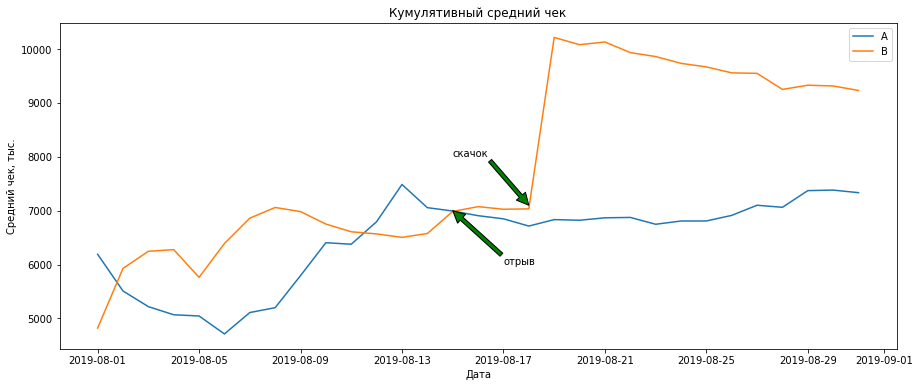

In [145]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_revA['date'], cumulative_revA['revenue']/cumulative_revA['orders'], label='A')
plt.plot(cumulative_revB['date'], cumulative_revB['revenue']/cumulative_revB['orders'], label='B')
plt.ylabel('Средний чек, тыс.')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек')
plt.annotate('скачок', xy=(dt.datetime(2019, 8, 18), 7100), xytext=(dt.datetime(2019, 8, 15), 8000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=(dt.datetime(2019, 8, 15), 7000), xytext=(dt.datetime(2019, 8, 17), 6000),
            arrowprops=dict(facecolor='g'))
plt.legend();

К концу теста показатели среднего чека становятся относительно равномерными. Снова заметны резкие скачки у обеих групп.

### График относительного изменения кумулятивного среднего чека группы B к группе A

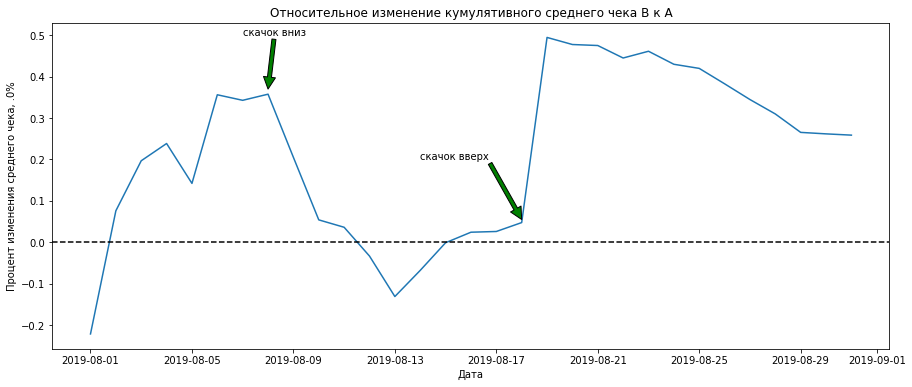

In [171]:
plt.figure(figsize=(15,6))
cumulative_rev_merged = cumulative_revA.merge(cumulative_revB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(cumulative_rev_merged['date'], (cumulative_rev_merged['revenueB']/cumulative_rev_merged['ordersB']) / 
         (cumulative_rev_merged['revenueA']/cumulative_rev_merged['ordersA'])-1)
plt.ylabel('Процент изменения среднего чека, .0%')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека В к А')
plt.annotate('скачок вверх', xy=(dt.datetime(2019, 8, 18), 0.055), xytext=(dt.datetime(2019, 8, 14), 0.2),
            arrowprops=dict(facecolor='g'))
plt.annotate('скачок вниз', xy=(dt.datetime(2019, 8, 8), 0.37), xytext=(dt.datetime(2019, 8, 7), 0.5),
            arrowprops=dict(facecolor='g'))
plt.axhline(y=0, color='black', linestyle='--');

Наблюдаются резкие скачки показателя на графике, что может свидетельствовать об аномалиях, но к концу теста показатель стабилизировался на отметке в 30 процентов выше группы А.

### График кумулятивного среднего количества заказов на посетителя по группам

In [102]:
cumulative_avg_ordA = cumulative_data[cumulative_data['group'] == 'A'] [['date', 'orders', 'visitors']]
cumulative_avg_ordB = cumulative_data[cumulative_data['group'] == 'B'] [['date', 'orders', 'visitors']]

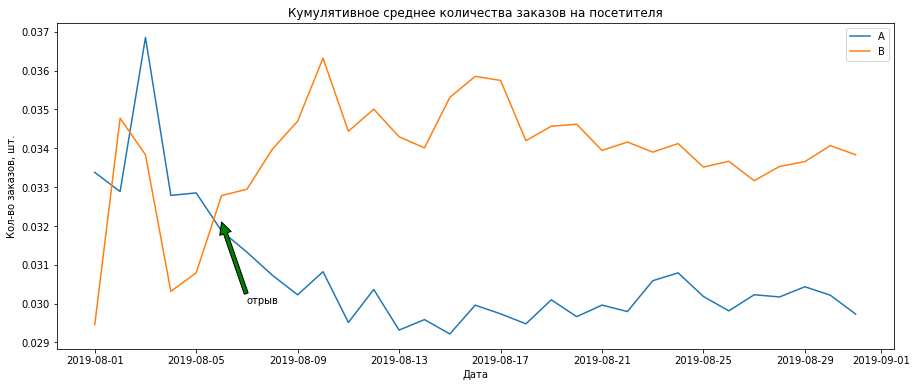

In [163]:
plt.figure(figsize=(15,6))
plt.plot(cumulative_avg_ordA['date'], cumulative_avg_ordA['orders']/cumulative_avg_ordA['visitors'], label='A')
plt.plot(cumulative_avg_ordB['date'], cumulative_avg_ordB['orders']/cumulative_avg_ordB['visitors'], label='B')
plt.ylabel('Кол-во заказов, шт.')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количества заказов на посетителя')
plt.annotate('отрыв', xy=(dt.datetime(2019, 8, 6), 0.0321), xytext=(dt.datetime(2019, 8, 7), 0.030),
            arrowprops=dict(facecolor='g'))
plt.legend();

Среднее количество заказов группы А заметно упало, а группа B поднялась и зафиксировалась выше группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

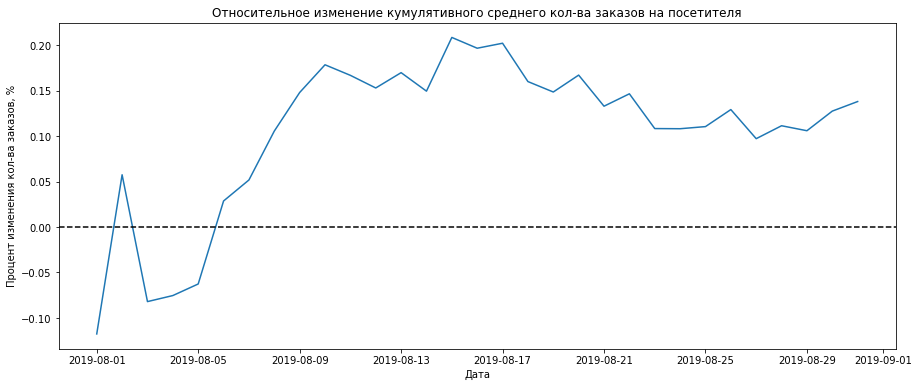

In [165]:
plt.figure(figsize=(15,6))
cumulative_avg_merge = cumulative_avg_ordA.merge(cumulative_avg_ordB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(cumulative_avg_merge['date'], (cumulative_avg_merge['ordersB']/cumulative_avg_merge['visitorsB']) / 
         (cumulative_avg_merge['ordersA']/cumulative_avg_merge['visitorsA'])-1)
plt.ylabel('Процент изменения кол-ва заказов, %')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего кол-ва заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--');

Несмотря на резкий скачок вниз в начале теста, показатель поднялся до 20% и стабилизировлся на 15% к концу теста.

### Точечный график количества заказов по пользователям

In [105]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

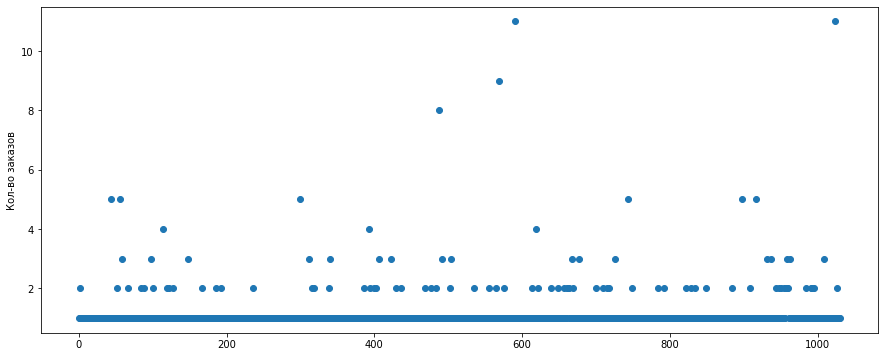

In [106]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Кол-во заказов');

Основная масса пользователей оформляла не более одного заказа, небольшое количество сделало 2 заказа. Есть малое число пользователей, которые купили более 3 товаров, также можно заметить два случая оформления более 10 заказов.

### 95-й и 99-й перцентили количества заказов на пользователя

In [107]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


95 перцентилю соответсвует 2 заказа, 99 - 4 заказа. Таким образом границу определения аномальных значений можно обозначить все, что больше 2.

### Точечный график стоимостей заказов

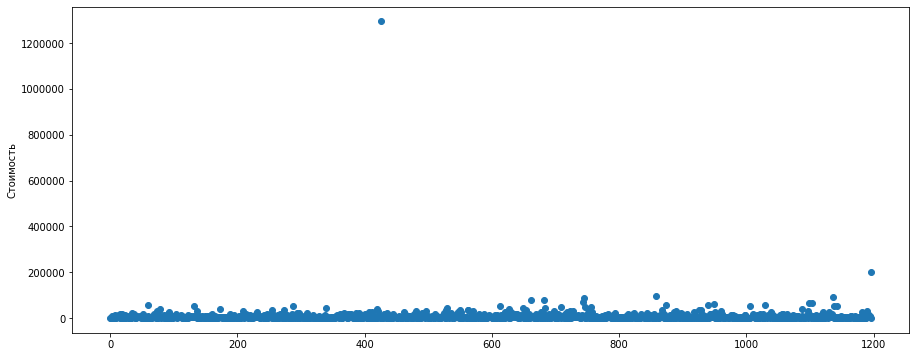

In [108]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,6))
plt.ticklabel_format(style='plain')
plt.ylabel('Стоимость')
plt.scatter(x_values, orders['revenue']);

Обнаружились аномально большие значения, как например заказа стоимость более 12000000. Из-за юольших значений трудно определить на какую сумму покупало большинство пользователей, можно сказать только то, что в основном покупали на сумму до 500000 рублей.

### 95-й и 99-й перцентили стоимости заказов

In [109]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


95 перцентилю соответсвует 28000, 99 - 58233. Так, обозначить границу можно на 30000, чтобы исключить все аномалии, влияющие на анализ.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [110]:
visitorsA = visitors[visitors['group'] == 'A'] [['date', 'visitors']]
visitorsA.columns = ['date', 'visitorsA']
cumulative_visA = (visitorsA
                   .apply(lambda x: visitorsA[visitorsA['date'] <= x['date']]
                          .agg({'date' : 'max', 'visitorsA' : 'sum'}), axis=1))
cumulative_visA.columns = ['date', 'cum_visitorsA']
visitorsB = visitors[visitors['group'] == 'B'] [['date', 'visitors']]
visitorsB.columns = ['date', 'visitorsB']
cumulative_visB = (visitorsB.apply(lambda x: visitorsB[visitorsB['date'] <= x['date']]
                                  .agg({'date' : 'max', 'visitorsB' : 'sum'}), axis=1))
cumulative_visB.columns = ['date', 'cum_visitorsB']

In [111]:
ordersA = (orders[orders['group'] == 'A'] [['date', 'transactionId', 'visitorId', 'revenue']]
           .groupby('date', as_index=False)
           .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersA.columns = ['date', 'orderA', 'revenueA']
cumulative_ordersA = ordersA.apply(lambda x: ordersA[ordersA['date'] <= x['date']]
                                  .agg({'date' : 'max', 'orderA' : 'sum', 'revenueA' : 'sum'}), axis=1).sort_values(by=['date'])
cumulative_ordersA.columns = ['date', 'cum_orderA', 'cum_revenueA']
ordersB = (orders[orders['group'] == 'B'] [['date', 'transactionId', 'visitorId', 'revenue']]
           .groupby('date', as_index=False)
           .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}))
ordersB.columns = ['date', 'orderB', 'revenueB']
cumulative_ordersB = ordersB.apply(lambda x: ordersB[ordersB['date'] <= x['date']]
                                  .agg({'date' : 'max', 'orderB' : 'sum', 'revenueB' : 'sum'}), axis=1).sort_values(by=['date'])
cumulative_ordersB.columns = ['date', 'cum_orderB', 'cum_revenueB']

In [112]:
data = (
    ordersA.merge(
        ordersB, left_on='date', right_on='date', how='left'
    )
    .merge(cumulative_ordersA, left_on='date', right_on='date', how='left')
    .merge(cumulative_ordersB, left_on='date', right_on='date', how='left')
    .merge(visitorsA, left_on='date', right_on='date', how='left')
    .merge(visitorsB, left_on='date', right_on='date', how='left')
    .merge(cumulative_visA, left_on='date', right_on='date', how='left')
    .merge(cumulative_visB, left_on='date', right_on='date', how='left')
)
data.head()

,date,orderA,revenueA,orderB,revenueB,cum_orderA,cum_revenueA,cum_orderB,cum_revenueB,visitorsA,visitorsB,cum_visitorsA,cum_visitorsB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [113]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId','orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId','orders']

Сформулируем гипотезы и проверим их.

1. Нулевая гипотеза гласит, что статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.
2. Альтернативная гипотеза гласит, что статистически значимые различия в выборке есть.

In [114]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Первое значение - p-value - показывает, что присутствуют значимые различия в среднем количестве заказов, поэотому отвергаем нулевую гипотезу. При этом относительный прирост группы B составлент около 14%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

1. Нулевая гипотеза гласит, что статистически значимых различий в среднем чеке заказа между группами по «сырым» данным не наблюдается. 
2. Альтернативная гипотеза гласит, что статистически значимые различия в выборке есть.

In [115]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Статистически значимого различия между выборками средних чеков не наблюдается, поскольку p-value значительно больше 0.05. Нулевую гипотезу не отвергаем. Относительный прирост группы В составляет примерно 26%.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [116]:
vis_many_ord = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                          ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']])
vis_many_exp_ord = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (pd.concat([vis_many_ord, vis_many_exp_ord], axis=0)
    .drop_duplicates()
    .sort_values())

In [117]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0) 

1. Нулевая гипотеза гласит, что статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным не наблюдается. 
2. Альтернативная гипотеза гласит, что статистически значимые различия в выборке есть.

In [118]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.172


По сравнению с сырыми данными изменений практически не наблюдается, снова наблюдаются значимые различия, так как p-value меньше 0.05. Относительный прирост для группы В составляет 17%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

1. Нулевая гипотеза гласит, что статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным не наблюдается. 
2. Альтернативная гипотеза гласит, что статистически значимые различия в выборке есть.

In [119]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                                       orders[np.logical_and(orders['group'] == 'B',
                                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()- 1))

0.720
-0.023


В сравнении с сырыми данными, статистически значимых так же не наблюдается, однако прирост для группы В сменился на проигрыш на -2%.

**Вывод:**
На основании графиков кумулятивных метрик, можно сделать вывод, что группа В опережает группу А. К примеру на графике относительного изменения кумулятивного среднего количества заказов на посетителя видно, что группа В опережает А и фиксируется на отметке 15%. В связи с этим можно сделать вывод, что тест можно завершать и фиксировать победу группы В.

## Вывод

Таким образом, в ходе обзора анализируемых датасетов была получена общая информация о данных датасетов. В ходе подготовки данных для анализа, датасеты были проверены на пропуски и дубликаты. Тип данных некоторых столбцов был изменен на подходящий. Также, были обнаружены пользователи, которые относятся к обеим группам. Приоритезация гипотез выделила гипотезу под названием "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". По метрике RICE она заняла первое место, по метрике ICE третье. Анализ кумулятивных графиков показал превосходство группы В над А. Точечные графики помогли выявить аномальные знаения количества заказов и стоимости, которые находятся за 95-м перцентилем. Выявив аномалии, был проведен анализ А/В теста по сырым и очищенным данным, которые показал, что существуют статистически значимые различия в среднем количестве заказов на посетителя, а также отсутствие различий в 